<a href="https://colab.research.google.com/github/sxs001/L4DA_resources/blob/main/multiple_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import plotly.graph_objs as go
import plotly.offline as pyo

In [9]:
url='https://raw.githubusercontent.com/tdmhub/L4DA_resources/main/cars2.csv'
df = pd.read_csv(url,delimiter=',')
df.head(3)



,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95


In [10]:
X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)

[107.2087328]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



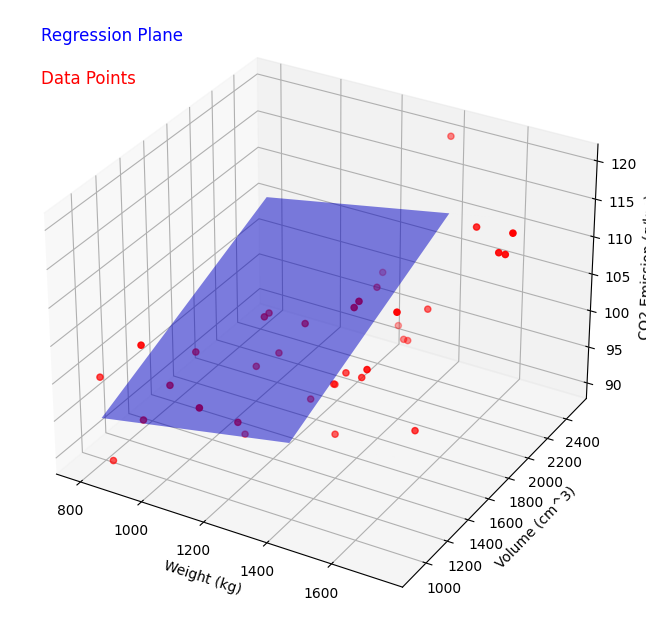

In [11]:
# Create a larger figure with increased size
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Weight'], df['Volume'], df['CO2'], c='r', marker='o', label='Data Points')
ax.set_xlabel('Weight (kg)')
ax.set_ylabel('Volume (cm^3)')
ax.set_zlabel('CO2 Emission (g/km)')

# Create a meshgrid for the 3D plane
xx, yy = np.meshgrid(df['Weight'], df['Volume'])
zz = regr.intercept_ + regr.coef_[0] * xx + regr.coef_[1] * yy

# Plot the 3D plane
ax.plot_surface(xx, yy, zz, alpha=0.5, rstride=100, cstride=100, color='b')

# Adjust the text position for better visibility
ax.text2D(0.05, 0.95, "Regression Plane", transform=ax.transAxes, color='b', fontsize=12)
ax.text2D(0.05, 0.88, "Data Points", transform=ax.transAxes, color='r', fontsize=12)

plt.show()

In [12]:
Xc=sm.add_constant(X)
model = sm.OLS(y, Xc).fit()

# Get the summary of the regression model, which includes p-values
summary = model.summary()

# Extract p-values from the summary
p_values = model.pvalues



print(summary)

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     9.966
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           0.000411
Time:                        09:51:11   Log-Likelihood:                -114.39
No. Observations:                  36   AIC:                             234.8
Df Residuals:                      33   BIC:                             239.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.6947      5.564     14.322      0.0

In [13]:
model.params

const     79.694719
Weight     0.007551
Volume     0.007805
dtype: float64

In [14]:
# Create a meshgrid for the 3D plane
xx, yy = np.meshgrid(df['Weight'], df['Volume'])
zz = regr.intercept_ + regr.coef_[0] * xx + regr.coef_[1] * yy

# Create data traces for the 3D scatter plot (data points) and the surface plot (regression plane)
scatter_data = go.Scatter3d(x=df['Weight'], y=df['Volume'], z=df['CO2'], mode='markers', marker=dict(color='red', size=5), name='Data Points')
surface_data = go.Surface(x=xx, y=yy, z=zz, colorscale='Blues', opacity=0.5, name='Regression Plane')

# Create a layout for the 3D plot
layout = go.Layout(scene=dict(xaxis_title='Weight (kg)', yaxis_title='Volume (cm^3)', zaxis_title='CO2 Emission (g/km)'))

# Create a Figure object and add the data traces and layout
fig = go.Figure(data=[scatter_data, surface_data], layout=layout)

# Save the interactive plot to an HTML file
pyo.plot(fig, filename='interactive_3d_plot.html')

# Alternatively, you can display the plot in a Jupyter Notebook using pyo.iplot(fig)

'interactive_3d_plot.html'